In [1]:
import dask
dask.config.set({"dataframe.query-planning": False})

import scanpy as sc
import numpy as np
import pandas as pd
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


sys.path.append("../../../workflow/scripts/")
import _utils
import readwrite
cfg = readwrite.config()
sns.set_style('ticks')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error a

# Params

In [2]:
# cfg paths
xenium_dir = Path(cfg['xenium_processed_data_dir'])
xenium_count_correction_dir = Path(cfg['xenium_count_correction_dir'])
xenium_std_seurat_analysis_dir = Path(cfg['xenium_std_seurat_analysis_dir'])
xenium_cell_type_annotation_dir = Path(cfg['xenium_cell_type_annotation_dir'])
results_dir = Path(cfg['results_dir'])
palette_dir = Path(cfg['xenium_metadata_dir'])
std_seurat_analysis_dir = Path(cfg['xenium_std_seurat_analysis_dir'])
scrnaseq_processed_data_dir = Path(cfg['scrnaseq_processed_data_dir'])
seurat_to_h5_dir = results_dir / 'seurat_to_h5'

# Params
signal_integrity_thresholds = [0.5, 0.7]
correction_methods = ['raw', 'split_fully_purified', 'resolvi', 'resolvi_supervised']
correction_methods += [f'ovrlpy_correction_{signal_integrity_threshold=}' for signal_integrity_threshold in signal_integrity_thresholds]
num_samples = 30
mixture_k = 50
normalisation = 'lognorm'
layer = 'data'
reference = 'matched_reference_combo'
method = 'rctd_class_aware'
level = 'Level2.1'
segmentation_palette = palette_dir / 'col_palette_segmentation.csv'
count_correction_palette = palette_dir / 'col_palette_correction_method.csv'

n_neighbors = 10
n_permutations = 30
n_repeats = 5
top_n = 20
scoring = 'f1'
markers = 'diffexpr'

xenium_levels = ["segmentation", "condition", "panel", "donor", "sample"]
order = ['breast','chuvio','lung','5k']


hue_segmentation = "segmentation"
hue_segmentation_order = [
    "10x_mm_0um",
    "10x_mm_5um",
    "10x_mm_15um",
    "10x_0um",
    "10x_5um",
    "10x_15um",
    "baysor",
    "proseg_expected",
    "proseg_mode",
    "segger",
]

hue_correction = 'correction_method'
hue_correction_order = [
    'raw',
    'ResolVI',
    'ResolVI supervised',
    'ovrlpy 0.5',
    'ovrlpy 0.7',
    'SPLIT',
]


rank_metrics = ["importances"]
plot_metrics = ['hypergeometric_pvalue','NES',f"n_hits_{top_n=}"]

labels_key = level

# Load results logreg

In [3]:
dfs = readwrite.read_contamination_metrics_results(
    results_dir,
    correction_methods,
    xenium_std_seurat_analysis_dir,
    reference,
    method,
    level,
    mixture_k,
    num_samples,
    normalisation,
    layer,
    evaluation='logreg'
)

Processing futures:  16%|█▋        | 246/1506 [00:18<02:02, 10.30it/s]  

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/

Processing futures:  20%|█▉        | 301/1506 [00:23<01:50, 10.89it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/segger/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/segger/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/segger/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo

Processing futures:  22%|██▏       | 333/1506 [00:26<01:35, 12.23it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_5um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_5um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_5um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_

Processing futures:  23%|██▎       | 342/1506 [00:27<01:41, 11.49it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_co

Processing futures:  25%|██▌       | 378/1506 [00:31<01:40, 11.24it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_15um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_15um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_15um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/match

Processing futures:  25%|██▌       | 381/1506 [00:31<01:36, 11.68it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_15um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_15um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_15um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference

Processing futures:  26%|██▌       | 393/1506 [00:31<00:54, 20.44it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_mm_5um/NSCLC/5k/0PSV/0PSV/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_mm_5um/NSCLC/5k/0PSV/0PSV/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_mm_5um/NSCLC/5k/0PSV/0PSV/lognorm/reference_based/matched_ref

Processing futures:  28%|██▊       | 423/1506 [00:34<01:12, 14.89it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_ref

Processing futures:  31%|███       | 462/1506 [00:39<01:22, 12.65it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_0um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_0um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/split_fully_purified/10x_0um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_

Processing futures:  67%|██████▋   | 1016/1506 [01:32<00:15, 31.26it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar

Processing futures:  70%|██████▉   | 1049/1506 [01:35<00:27, 16.87it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/

Processing futures:  73%|███████▎  | 1101/1506 [01:39<00:24, 16.86it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquetFile does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1G73/1G73/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1G73/1G73/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/

Processing futures:  76%|███████▌  | 1147/1506 [01:41<00:13, 26.62it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquetFile does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1G73/1G73/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1G73/1G73/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/resu

Processing futures:  79%|███████▉  | 1189/1506 [01:44<00:13, 24.32it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GDD/1GDD/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GDD/1GDD/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/co

Processing futures:  82%|████████▏ | 1230/1506 [01:47<00:11, 24.90it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_pap

Processing futures:  84%|████████▍ | 1266/1506 [01:49<00:09, 25.59it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar

Processing futures:  87%|████████▋ | 1305/1506 [01:52<00:09, 20.92it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/

Processing futures:  90%|████████▉ | 1354/1506 [01:54<00:05, 28.64it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_pap

Processing futures:  93%|█████████▎| 1400/1506 [01:56<00:02, 38.17it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_

Processing futures:  95%|█████████▌| 1438/1506 [01:59<00:02, 26.47it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/

Processing futures:  98%|█████████▊| 1479/1506 [02:02<00:00, 27.18it/s]

File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_permutations_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_importances_logreg.parquet
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/contamination_metrics_diffexpr_logreg_corrected_counts/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/0PSV/0PSV/lognorm/data_matched_reference_combo_rctd_class_aware_Level2.1_markers_rank_significance_logreg.json
File does not exist: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_pap

Processing futures: 100%|██████████| 1506/1506 [02:03<00:00, 12.15it/s]


# Load corrected counts

In [ ]:
xenium_paths = {}
xenium_annot_paths = {}

for correction_method in correction_methods:
    xenium_paths[correction_method] = {}
    xenium_annot_paths[correction_method] = {}
    
    for segmentation in (segmentations := xenium_std_seurat_analysis_dir.iterdir()):
        if segmentation.stem == 'proseg_mode':
            continue
        for condition in (conditions := segmentation.iterdir()): 
            for panel in (panels := condition.iterdir()):
                for donor in (donors := panel.iterdir()):
                    for sample in (samples := donor.iterdir()):

                        k = (segmentation.stem,condition.stem,panel.stem,donor.stem,sample.stem)
                        name = '/'.join(k)

                        # raw samples
                        if 'proseg' in segmentation.stem:
                            k_proseg = ('proseg',condition.stem,panel.stem,donor.stem,sample.stem)
                            name_proseg = '/'.join(k_proseg)
                            sample_dir = xenium_dir / f'{name_proseg}/raw_results'
                        else:
                            sample_dir = xenium_dir / f'{name}/normalised_results/outs'

                        sample_annotation = xenium_cell_type_annotation_dir / f'{name}/{normalisation}/reference_based/{reference}/{method}/{level}/single_cell/labels.parquet'
                        
                        if correction_method == 'raw':
                            xenium_paths[correction_method][k] = sample_dir
                            xenium_annot_paths[correction_method][k] = sample_annotation
                        
                        # corrected samples
                        else:
                            if correction_method == "split_fully_purified":
                                name_corrected = f'{name}/{normalisation}/reference_based/{reference}/{method}/{level}/single_cell/split_fully_purified/'
                                sample_corrected_counts_path = xenium_count_correction_dir / f"{name_corrected}/corrected_counts.h5"

                            else:
                                if correction_method == "resolvi":
                                    name_corrected = f'{name}/{mixture_k=}/{num_samples=}/'
                                elif correction_method == "resolvi_supervised":
                                    name_corrected = f'{name}/{normalisation}/reference_based/{reference}/{method}/{level}/{mixture_k=}/{num_samples=}'
                                elif "ovrlpy" in correction_method:
                                    name_corrected = f'{name}'

                                sample_corrected_counts_path = results_dir / f"{correction_method}/{name_corrected}/corrected_counts.h5"
                            sample_normalised_counts = xenium_std_seurat_analysis_dir / f'{name}/{normalisation}/normalised_counts/{layer}.parquet'
                            sample_idx = xenium_std_seurat_analysis_dir / f'{name}/{normalisation}/normalised_counts/cells.parquet'

                            xenium_paths[correction_method][k] = sample_corrected_counts_path


ads = readwrite.read_count_correction_samples(xenium_paths,correction_methods[1:])
ads['raw'] = readwrite.read_xenium_samples(xenium_paths['raw'],anndata=True,transcripts=False,max_workers=6)

# fix obs names for proseg expected, load cell types
# filter out cells without labels (this will apply QC thresholds as well since annotation is done after QC)
for correction_method in correction_methods:
    for k, ad in ads[correction_method].items():
        if ad is not None:

            if correction_method == 'raw':
                if k[0] == "proseg_expected": 
                    ad.obs_names = ad.obs_names.astype(str)
                    ad.obs_names = "proseg-" + ad.obs_names

                # filter cells and read labels for raw
                ad.obs[labels_key] = pd.read_parquet(xenium_annot_paths['raw'][k]).set_index("cell_id").iloc[:, 0]
                

                ad = ad[ad.obs[labels_key].notna()]
                if labels_key == "Level2.1":
                    # for custom Level2.1, simplify subtypes
                    ad.obs.loc[ad.obs[labels_key].str.contains("malignant"), labels_key] = "malignant cell"
                    ad.obs.loc[ad.obs[labels_key].str.contains("T cell"), labels_key] = "T cell"     
                    
                # remove tissue from cell type name
                ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)
                
                ads['raw'][k] = ad

            # filter cells and add labels from raw
            if correction_method != 'raw':
                ad.obs[labels_key] = ads['raw'][k].obs[labels_key]
                ad = ad[[c for c in ads['raw'][k].obs_names if c in ad.obs_names]]
                ads[correction_method][k] = ad


Processing split_fully_purified:   0%|          | 0/251 [00:00<?, ?it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/proseg_expected/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:   2%|▏         | 5/251 [00:17<13:20,  3.25s/it]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/proseg_expected/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/proseg_expected/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  19%|█▊        | 47/251 [00:47<02:13,  1.53it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/segger/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/segger/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  35%|███▌      | 89/251 [00:59<00:38,  4.18it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  36%|███▋      | 91/251 [01:01<01:22,  1.93it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_5um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_5um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  50%|████▉     | 125/251 [01:15<01:25,  1.47it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_15um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_15um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  52%|█████▏    | 131/251 [01:15<00:26,  4.45it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_15um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_15um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/0PSV/0PSV/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file:

Processing split_fully_purified:  53%|█████▎    | 134/251 [01:16<00:30,  3.83it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1GDD/1GDD/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open f

Processing split_fully_purified:  57%|█████▋    | 142/251 [01:17<00:17,  6.39it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1GAC/1GAC/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1GAC/1GAC/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1GVD/1GVD/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open f

Processing split_fully_purified:  59%|█████▉    | 149/251 [01:18<00:10, 10.14it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1GQ9/1GQ9/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_mm_5um/NSCLC/5k/1GQ9/1GQ9/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  68%|██████▊   | 170/251 [01:28<00:41,  1.95it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/baysor/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing split_fully_purified:  86%|████████▋ | 217/251 [01:42<00:06,  5.36it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_0um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_0um/NSCLC/5k/1G73/1G73/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/count_correction/10x_0um/NSCLC/chuvio/1GA2/1GA2/lognorm/reference_based/matched_reference_combo/rctd_class_aware/Level2.1/single_cell/split_fully_purified/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: 

Processing resolvi_supervised: 100%|██████████| 251/251 [00:29<00:00,  8.55it/s]
Processing ovrlpy_correction_signal_integrity_threshold=0.5:   3%|▎         | 8/251 [00:02<01:01,  3.98it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/proseg_expected/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_f

Processing ovrlpy_correction_signal_integrity_threshold=0.5:  23%|██▎       | 57/251 [00:05<00:06, 28.54it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/segger/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/

Processing ovrlpy_correction_signal_integrity_threshold=0.5:  35%|███▌      | 88/251 [00:08<00:13, 11.99it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.5:  38%|███▊      | 95/251 [00:09<00:12, 12.08it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_5um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PR

Processing ovrlpy_correction_signal_integrity_threshold=0.5:  50%|█████     | 126/251 [00:12<00:18,  6.85it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1GAC/1GAC/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1GAC/1GAC/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /wor

Processing ovrlpy_correction_signal_integrity_threshold=0.5:  58%|█████▊    | 145/251 [00:12<00:05, 21.09it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_15um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /wor

Processing ovrlpy_correction_signal_integrity_threshold=0.5:  60%|██████    | 151/251 [00:13<00:05, 19.45it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_mm_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_mm_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.5:  73%|███████▎  | 182/251 [00:15<00:03, 18.42it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/

Processing ovrlpy_correction_signal_integrity_threshold=0.5:  74%|███████▎  | 185/251 [00:16<00:03, 19.62it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/baysor/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.5:  86%|████████▌ | 215/251 [00:18<00:02, 12.12it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.5:  90%|█████████ | 227/251 [00:19<00:01, 19.16it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.5/10x_0um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PR

Processing ovrlpy_correction_signal_integrity_threshold=0.5: 100%|██████████| 251/251 [00:19<00:00, 12.56it/s]
Processing ovrlpy_correction_signal_integrity_threshold=0.7:   3%|▎         | 7/251 [00:02<00:43,  5.56it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_f

Processing ovrlpy_correction_signal_integrity_threshold=0.7:   6%|▋         | 16/251 [00:02<00:14, 16.38it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/proseg_expected/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_f

Processing ovrlpy_correction_signal_integrity_threshold=0.7:  20%|█▉        | 50/251 [00:04<00:12, 16.35it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Error reading /work/PRTNR/

Processing ovrlpy_correction_signal_integrity_threshold=0.7:  23%|██▎       | 58/251 [00:04<00:08, 22.01it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/segger/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.7:  38%|███▊      | 95/251 [00:07<00:05, 27.91it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PR

Processing ovrlpy_correction_signal_integrity_threshold=0.7:  39%|███▉      | 99/251 [00:07<00:05, 26.74it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_5um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.7:  52%|█████▏    | 130/251 [00:09<00:07, 15.23it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_15um/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /wor

Processing ovrlpy_correction_signal_integrity_threshold=0.7:  58%|█████▊    | 145/251 [00:10<00:03, 26.73it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_mm_5um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_mm_5um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_mm_5um/NSCLC/5k/1GAC/1GAC/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_mm_5um/NSCLC/5k/1GAC/1GAC/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error read

Processing ovrlpy_correction_signal_integrity_threshold=0.7:  60%|██████    | 151/251 [00:10<00:03, 31.90it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_mm_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_mm_5um/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.7:  71%|███████▏  | 179/251 [00:13<00:03, 18.77it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/0PSV/0PSV/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/1GAC/1GAC/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/1GAC/1GAC/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/

Processing ovrlpy_correction_signal_integrity_threshold=0.7:  73%|███████▎  | 184/251 [00:13<00:02, 22.95it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/1GVD/1GVD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/1GVD/1GVD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/1GDD/1GDD/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/baysor/NSCLC/5k/1GDD/1GDD/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Processing ovrlpy_correction_signal_integrity_threshold=0.7:  90%|█████████ | 227/251 [00:15<00:00, 29.71it/s]

Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/1G73/1G73/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/1G73/1G73/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/ovrlpy_correction_signal_integrity_threshold=0.7/10x_0um/NSCLC/5k/1GQ9/1GQ9/corrected_counts.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading /work/PR

Processing ovrlpy_correction_signal_integrity_threshold=0.7: 100%|██████████| 251/251 [00:16<00:00, 15.50it/s]
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/0PD6/0PD6/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1FYB/1FYB/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1BCA/1BCA/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not presen

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/OPHI/OPHI_3/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to con

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1256/1256/raw_results/metrics_summary.csv
metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1GV1/1GV1/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to con

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/OPHI/OPHI_1/raw_results/metrics_summary.csv

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")



metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/OPHI/OPHI_2/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1FHZ/1FHZ/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/0U9A/0U9A/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1GVR/1GVR/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1ESQ/1ESQ/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/14LZ/14LZ/raw_results/metrics_summary.csv

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1GUC/1GUC/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/0VRA/0VRA/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/0OE1/0OE1/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transf

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/0PSV/0PSV/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at:

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


 /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/0S8R/0S8R/raw_results/metrics_summary.csv

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")



metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1FO7/1FO7/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/1H27/1H27/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/breast/breast/19TB/19TB/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1GFF/1GFF/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1GDD/1GDD/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not presen

metrics_summary.csv not found at: 

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1GQ9/1GQ9/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1GAC/1GAC/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/0WMU/0WMU_2/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/0WMU/0WMU_1/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1G73/1G73/raw_results/metrics_summary.csv

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1GVD/1GVD/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/chuvio/0PSV/0PSV_2/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', wh

metrics_summary.csv not found at:metrics_summary.csv not found at:  /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/chuvio/0WMU/0WMU/raw_results/metrics_summary.csv/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/chuvio/0PSV/0PSV_1/raw_results/metrics_summary.csv



/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/lung/1GA2/1GA2/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/chuvio/1G73/1G73/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/chuvio/1GA2/1GA2/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/5k/1GQ9/1GQ9/raw_results/metrics_summary.csv
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1FYB/1FYB/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/OPHI/OPHI_3/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/OPHI/OPHI_1/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/OPHI/OPHI_2/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1BCA/1BCA/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/0PD6/0PD6/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1256/1256/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1GV1/1GV1/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1GVR/1GVR/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1FHZ/1FHZ/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/0U9A/0U9A/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1ESQ/1ESQ/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/0VRA/0VRA/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/14LZ/14LZ/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1H27/1H27/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1GUC/1GUC/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/0OE1/0OE1/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/19TB/19TB/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/breast/br
         east/1FO7/1FO7/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/0S8R/0S8R/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1GFF/1GFF/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/0WMU/0WMU_1/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/0WMU/0WMU_2/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/lun
         g/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/5k/0PSV/0PSV/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/5k/1GDD/1GDD/raw_results/metrics_summary.csv
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/chu
         vio/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                              
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/chu
         vio/0PSV/0PSV_1/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/5k/1GAC/1GAC/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/chu
         vio/0PSV/0PSV_2/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/chu
         vio/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/chu
         vio/0WMU/0WMU/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/5k/
         0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/5k/
         1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                                  
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/5k/
         1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                  
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/5k/
         1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5       

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/5k/
         1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/segger/NSCLC/5k/
         1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                  
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1FYB/1FYB/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/OPHI/OPHI_3/normalised_results/outs/cell_feature_matrix.h5                                          


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/OPHI/OPHI_1/normalised_results/outs/cell_feature_matrix.h5                                          


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/OPHI/OPHI_2/normalised_results/outs/cell_feature_matrix.h5                                          
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1BCA/1BCA/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/0PD6/0PD6/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1256/1256/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1GV1/1GV1/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1GVR/1GVR/normalised_results/outs/cell_feature_matrix.h5 

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/0U9A/0U9A/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is an

INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1ESQ/1ESQ/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/0VRA/0VRA/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/14LZ/14LZ/normalised_results/outs/cell_feature_matrix.h5 

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1GUC/1GUC/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/0OE1/0OE1/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/19TB/19TB/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/breast/b
         reast/1FO7/1FO7/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                               
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/0S8R/0S8R/normalised_results/outs/cell_feature_matrix.h5                                               
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5    

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1GFF/1GFF/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/0WMU/0WMU_1/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/0WMU/0WMU_2/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                               
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/lu
         ng/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/ch
         uvio/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/ch
         uvio/0PSV/0PSV_1/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/ch
         uvio/0PSV/0PSV_2/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/ch
         uvio/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/ch
         uvio/0WMU/0WMU/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/5k
         /0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5      

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/5k
         /1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/5k
         /1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/5k
         /1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/5k
         /1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_5um/NSCLC/5k
         /1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                 
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1FYB/1FYB/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/OPHI/OPHI_3/normalised_results/outs/cell_feature_matrix.h5                                         
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/OPHI/OPHI_1/normalised_results/outs/cell_feature_matrix.h5                                         


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/OPHI/OPHI_2/normalised_results/outs/cell_feature_matrix.h5                                         


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1BCA/1BCA/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/0PD6/0PD6/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1256/1256/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1GV1/1GV1/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1GVR/1GVR/normalised_results/outs/cell_feature_matrix.h5

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/0U9A/0U9A/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1ESQ/1ESQ/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/0VRA/0VRA/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/14LZ/14LZ/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1H27/1H27/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1GUC/1GUC/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/0OE1/0OE1/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/19TB/19TB/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/breast/
         breast/1FO7/1FO7/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                              
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/0S8R/0S8R/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                              
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1GFF/1GFF/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                              
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/0WMU/0WMU_1/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/0WMU/0WMU_2/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/l
         ung/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/c
         huvio/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/c
         huvio/0PSV/0PSV_1/normalised_results/outs/cell_feature_matrix.h5                                          


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/c
         huvio/0PSV/0PSV_2/normalised_results/outs/cell_feature_matrix.h5                                          


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/c
         huvio/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/c
         huvio/0WMU/0WMU/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/5
         k/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/5
         k/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/5
         k/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_polygons', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/5k/1GVD/1GVD/raw_results/metrics_summary.csv


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/5
         k/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/5
         k/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_15um/NSCLC/5
         k/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_mm_5um/NSCLC
         /5k/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_mm_5um/NSCLC
         /5k/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                              
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_mm_5um/NSCLC
         /5k/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_mm_5um/NSCLC
         /5k/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_mm_5um/NSCLC
         /5k/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                              
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_mm_5um/NSCLC
         /5k/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1FYB/1FYB/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/OPHI/OPHI_3/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/OPHI/OPHI_1/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/OPHI/OPHI_2/normalised_results/outs/cell_feature_matrix.h5                                           


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1BCA/1BCA/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/0PD6/0PD6/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1256/1256/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1GV1/1GV1/normalised_results/outs/cell_feature_matrix.h5  

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1GVR/1GVR/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is an

INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1FHZ/1FHZ/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/0U9A/0U9A/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1ESQ/1ESQ/normalised_results/outs/cell_feature_matrix.h5  

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/0VRA/0VRA/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/14LZ/14LZ/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1H27/1H27/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1GUC/1GUC/normalised_results/outs/cell_feature_matrix.h5  

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/0OE1/0OE1/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/19TB/19TB/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/breast/br
         east/1FO7/1FO7/normalised_results/outs/cell_feature_matrix.h5  

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/0S8R/0S8R/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1GFF/1GFF/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/0WMU/0WMU_1/normalised_results/outs/cell_feature_matrix.h5   

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/0WMU/0WMU_2/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is an

INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/lun
         g/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/chu
         vio/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5   

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/chu
         vio/0PSV/0PSV_1/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/chu
         vio/0PSV/0PSV_2/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/chu
         vio/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/chu
         vio/0WMU/0WMU/normalised_results/outs/cell_feature_matrix.h5                                              


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/5k/
         0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/5k/
         1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/5k/
         1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/5k/
         1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/baysor/NSCLC/5k/
         1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                  


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1FYB/1FYB/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/OPHI/OPHI_3/normalised_results/outs/cell_feature_matrix.h5                                          
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/OPHI/OPHI_1/normalised_results/outs/cell_feature_matrix.h5                                          
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/OPHI/OPHI_2/normalised_results/outs/cell_feature_matrix.h

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1BCA/1BCA/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/0PD6/0PD6/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1256/1256/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1GV1/1GV1/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1GVR/1GVR/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1FHZ/1FHZ/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/0U9A/0U9A/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1ESQ/1ESQ/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/0VRA/0VRA/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/14LZ/14LZ/normalised_results/outs/cell_feature_matrix.h5                                            


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1H27/1H27/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/1GUC/1GUC/normalised_results/outs/cell_feature_matrix.h5                                            
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/breast/b
         reast/0OE1/0OE1/normalised_results/outs/cell_feature_matrix.h5 

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/0S8R/0S8R/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                               
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                               
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1GFF/1GFF/normalised_results/outs/cell_feature_matrix.h5    

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/0WMU/0WMU_1/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/0WMU/0WMU_2/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5    

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/lu
         ng/1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                               


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/ch
         uvio/1GA2/1GA2/normalised_results/outs/cell_feature_matrix.h5                                             


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/ch
         uvio/0PSV/0PSV_1/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/ch
         uvio/0PSV/0PSV_2/normalised_results/outs/cell_feature_matrix.h5                                           
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/ch
         uvio/1G73/1G73/normalised_results/outs/cell_feature_matrix.h5  

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/ch
         uvio/0WMU/0WMU/normalised_results/outs/cell_feature_matrix.h5                                             
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/5k
         /0PSV/0PSV/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/5k
         /1G73/1G73/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/5k
         /1GDD/1GDD/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/5k
         /1GAC/1GAC/normalised_results/outs/cell_feature_matrix.h5                                                 
INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/5k
         /1GQ9/1GQ9/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


INFO     reading                                                                                                   
         /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/10x_0um/NSCLC/5k
         /1GVD/1GVD/normalised_results/outs/cell_feature_matrix.h5                                                 


/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Trans

metrics_summary.csv not found at: /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/processed/segmentation/proseg/NSCLC/5k/1G73/1G73/raw_results/metrics_summary.csv


TypeError: Cannot setitem on a Categorical with a new category (malignant cell), set the categories first

In [ ]:

# fix obs names for proseg expected, load cell types
# filter out cells without labels (this will apply QC thresholds as well since annotation is done after QC)
for correction_method in correction_methods:
    for k, ad in ads[correction_method].items():
        if ad is not None:

            if correction_method == 'raw':
                if k[0] == "proseg_expected": 
                    ad.obs_names = ad.obs_names.astype(str)
                    ad.obs_names = "proseg-" + ad.obs_names

                # filter cells and read labels for raw
                ad.obs[labels_key] = pd.read_parquet(xenium_annot_paths['raw'][k]).set_index("cell_id").iloc[:, 0]

                ad = ad[ad.obs[labels_key].notna()]
                if labels_key == "Level2.1":
                    # for custom Level2.1, simplify subtypes
                    ad.obs.loc[ad.obs[labels_key].str.contains("malignant"), labels_key] = "malignant cell"
                    ad.obs.loc[ad.obs[labels_key].str.contains("T cell"), labels_key] = "T cell"     
                    
                # remove tissue from cell type name
                ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)
                
                ads['raw'][k] = ad

            # filter cells and add labels from raw
            if correction_method != 'raw':
                ad.obs[labels_key] = ads['raw'][k].obs[labels_key]
                ad = ad[[c for c in ads['raw'][k].obs_names if c in ad.obs_names]]
                ads[correction_method][k] = ad


/tmp/ipykernel_3009151/3919560845.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)
/tmp/ipykernel_3009151/3919560845.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)
/tmp/ipykernel_3009151/3919560845.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)
/tmp/ipykernel_3009151/3919560845.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)
/tmp/ipykernel_3009151/3919560845.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of v

In [6]:
# def get_n_genes(adata):
#     return (ad.X>0).sum(1).A1

# process_count_correction_samples_out_of_core(xenium_paths, correction_methods, get_n_genes)

# Load scRNA

In [11]:
layer = 'RNA_counts'
genes = {}
genes['NSCLC'] = pd.read_csv('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/markers/Xenium_hLung_v1_metadata.csv')['Gene'].tolist()
genes['breast'] = pd.read_csv('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/markers/Xenium_hLung_v1_metadata.csv')['Gene'].tolist()

ads_scrna = {}
for ref in (refs := scrnaseq_processed_data_dir.iterdir()):
    ref_name = ref.stem
    ref_dir = seurat_to_h5_dir / ref_name

    if 'matched_combo_standard' not in ref_name:
        continue

    print(ref_name)

    ad = sc.read_10x_h5(ref_dir / f"{layer}.h5")
    ad.obs[labels_key] = pd.read_parquet(ref_dir / "metadata.parquet").set_index("cell_id")[labels_key]
    ad = ad[ad.obs[labels_key].notna()]

    if labels_key == "Level2.1":
        # for custom Level2.1, simplify subtypes
        ad.obs.loc[ad.obs[labels_key].str.contains("malignant"),labels_key] = "malignant cell"
        ad.obs.loc[ad.obs[labels_key].str.contains("T cell"),labels_key] = "T cell" 
    # remove tissue from cell type name
    ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)

    ads_scrna[ref_name] = ad

ads_scrna['NSCLC'] = ads_scrna.pop('matched_combo_standard_breast_specific')
ads_scrna['breast'] = ads_scrna.pop('matched_combo_standard_lung_specific')


# Prepare pseudo bulk data
pbs_scrna = get_pseudo_bulk_scrna(ads_scrna, labels_key)

matched_combo_standard_breast_specific


/tmp/ipykernel_3009151/986364048.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)


matched_combo_standard_lung_specific


/tmp/ipykernel_3009151/986364048.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs[labels_key] = ad.obs[labels_key].str.replace(r" of .+", "", regex=True)


# Plot decontamination results marker ranks

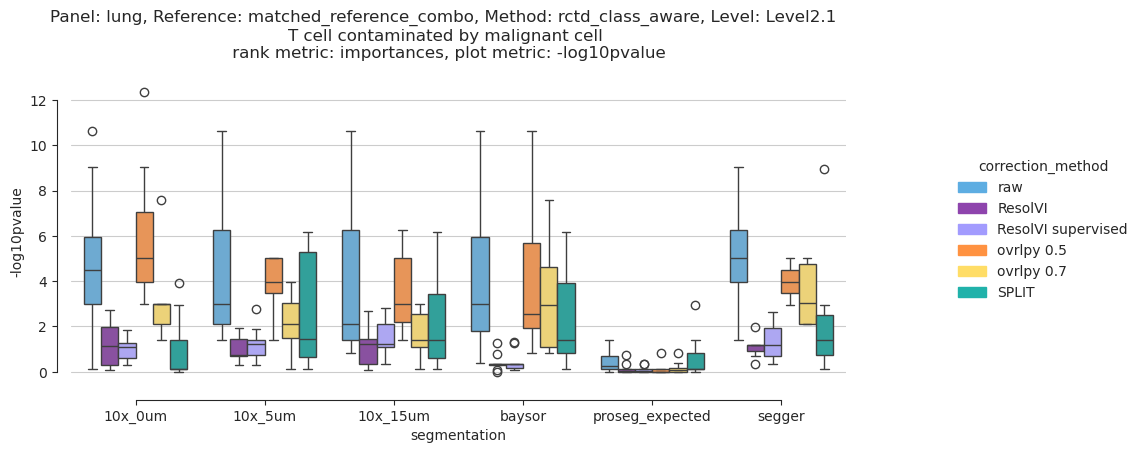

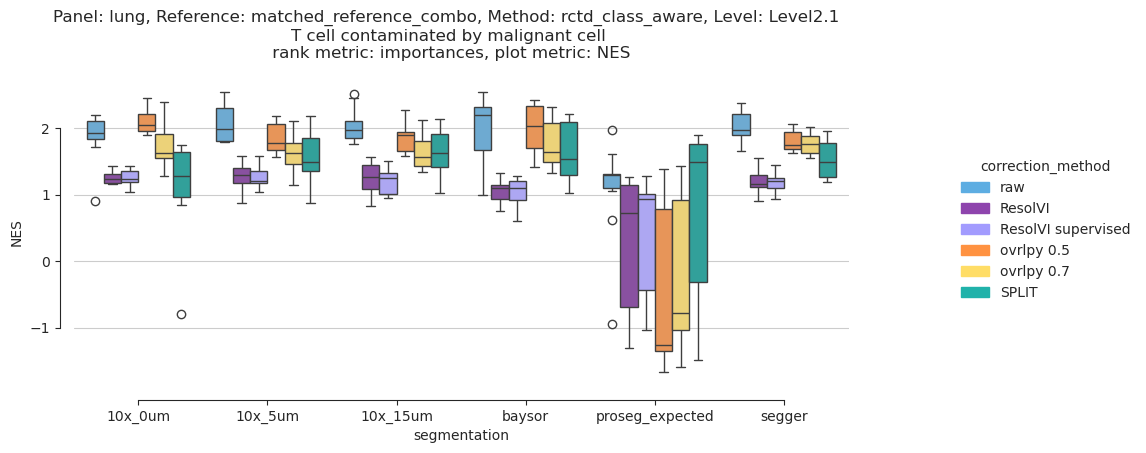

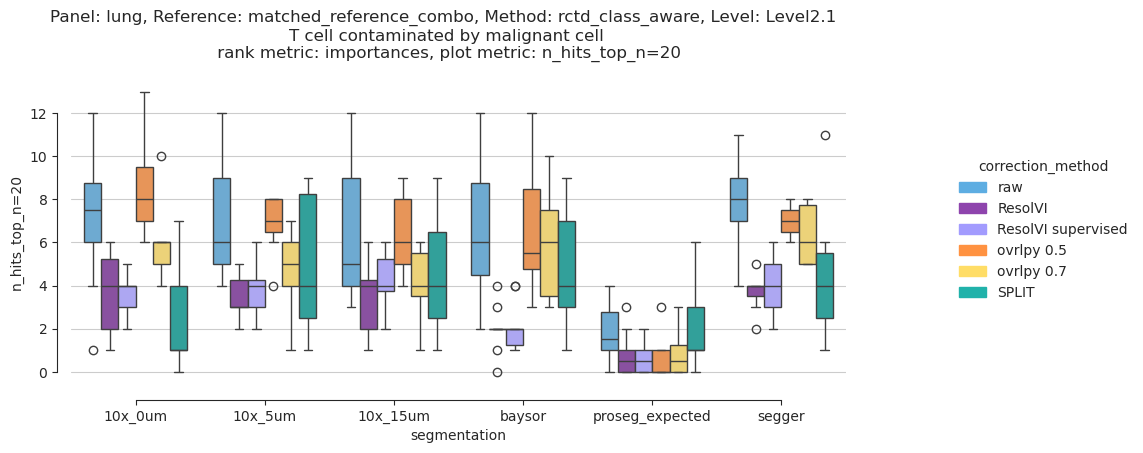

In [5]:
ref_panel = 'lung'
cti = 'T cell'
ctj = 'malignant cell'
use_precomputed = True
palette = pd.read_csv(count_correction_palette, index_col=0).iloc[:, 0]

for rank_metric in rank_metrics:
    plot_metrics_ = plot_metrics[-1:] if rank_metric == 'mean_zscore' else plot_metrics
    for plot_metric in plot_metrics_:
        df = _utils.get_df_marker_rank_significance_plot(dfs['df_markers_rank_significance_logreg'],
                        rank_metric=rank_metric,plot_metric=plot_metric,
                        correction_methods=correction_methods,use_precomputed=use_precomputed)

        df = df.query(f"panel == '{ref_panel}' and cti == @cti and ctj == @ctj")

        if plot_metric in ['hypergeometric_pvalue','mean_zscore_pvalue']:
            df['-log10pvalue'] = -np.log10(df[plot_metric].astype(float))
            plot_metric = '-log10pvalue'

        # plotting params, palette
        title = f"Panel: {ref_panel}, Reference: {reference}, Method: {method}, Level: {level} \n{cti} contaminated by {ctj}\n rank metric: {rank_metric}, plot metric: {plot_metric}"
        unique_labels = [c for c in hue_correction_order if c in np.unique(df[hue_correction].dropna())]
        unique_labels = unique_labels + [c for c in np.unique(df[hue_correction].dropna()) if c not in unique_labels]
        palette = {u: palette[u] for u in unique_labels}
        legend_handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]

        ### hypergeometric pvalue boxplot
        f = plt.figure(figsize=(10, 4))
        ax = plt.subplot()
        g = sns.boxplot(df,x='segmentation',y=plot_metric, 
                        hue=hue_correction, hue_order=unique_labels, 
                        legend=False, palette=palette,ax=ax,
                        order=[s for s in hue_segmentation_order if s in df['segmentation'].unique()]
                        )

        sns.despine(offset=10, trim=True)
        ax.yaxis.grid(True)

        plt.suptitle(title,y=1.05)
        f.legend(
            handles=legend_handles,
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            title=hue_correction,
            frameon=False,
        )
        # plt.tight_layout(rect=[0, 0, 1, 0.95])
        # plt.savefig(out_file, dpi=dpi, bbox_inches="tight")
        plt.show()

In [ ]:
ref_segmentation = '10x_5um'
cti = 'T cell'
ctj = 'malignant cell'

for rank_metric in rank_metrics:
    for plot_metric in plot_metrics:
        # extract df for rank_metric used for diffexpr and plot_metric used for GSEA/hypergeometric test
        df = _utils.get_df_plot(dfs,key='df_markers_rank_significance_logreg',
                        rank_metric=rank_metric,plot_metric=plot_metric,
                        correction_methods=correction_methods,use_precomputed=use_precomputed)
        
        df[plot_metric] = df[plot_metric].astype(float)
        
        if plot_metric == 'hypergeometric_pvalue':
            df['-log10pvalue'] = -np.log10(df[plot_metric])
            plot_metric = '-log10pvalue'

        u_condition_panel = df[['condition','panel']].drop_duplicates().values

        for condition,panel in u_condition_panel:

            df_plot = df.query(f"segmentation == '{ref_segmentation}' and condition == '{condition}' and panel == '{panel}'")
            df_plot = df_plot.groupby(['cti', 'ctj'])[plot_metric].mean().unstack()
            df_plot = df_plot.loc[df_plot.sum(1).sort_values(ascending=False).index]
            df_plot = df_plot[df_plot.sum(0).sort_values(ascending=False).index]

            title = f"Reference: {reference}, Method: {method}, Level: {level} \nrank metric: {rank_metric}, plot metric: {plot_metric}"

            f = plt.figure(figsize=(8,8))
            ax = plt.subplot()
            ax.set_title(title,fontsize=20)
            g = sns.heatmap(df_plot,cmap='coolwarm',center=-np.log10(0.05) if plot_metric == '-log10pvalue' else 0.)
            plt.show()

# Plot results permutation f1 scores

In [ ]:
ref_panel = 'lung'
cti = 'T cell'
ctj = 'malignant cell'

df = _utils.get_df_permutations_logreg_plot(dfs['df_permutations_logreg'],correction_methods)
df = df.query("panel == @ref_panel and cti == @cti and ctj == @ctj")
df['f1_diff'] = df['f1_score'] - df['perm_meanf1_score']

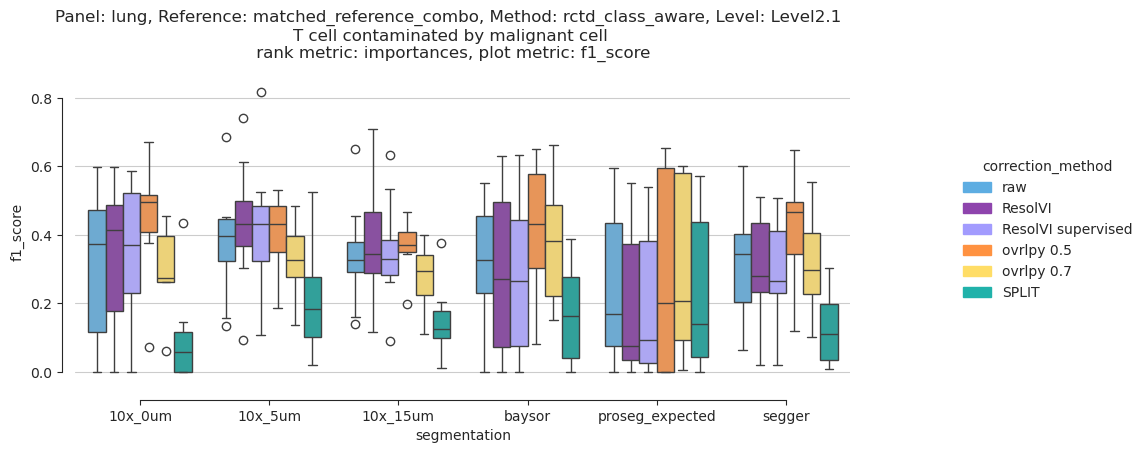

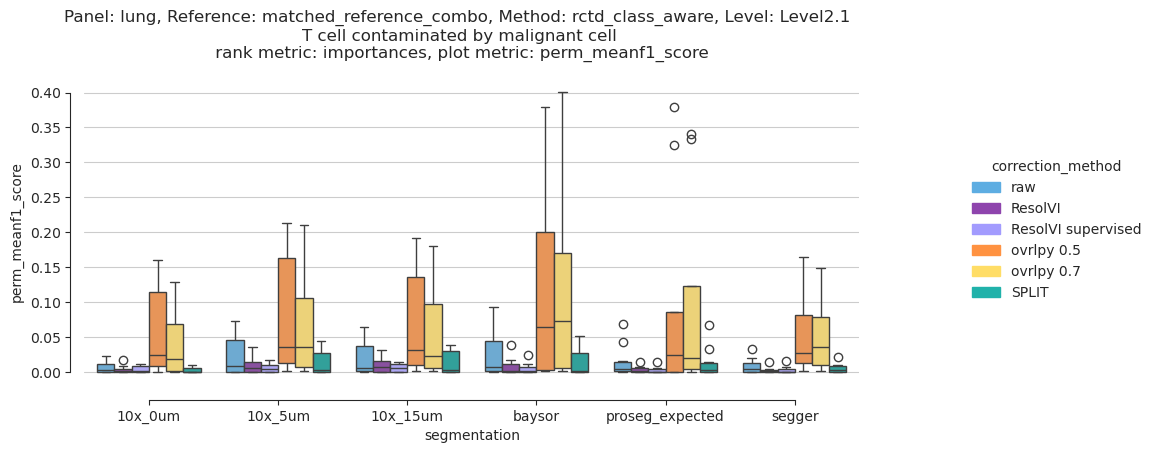

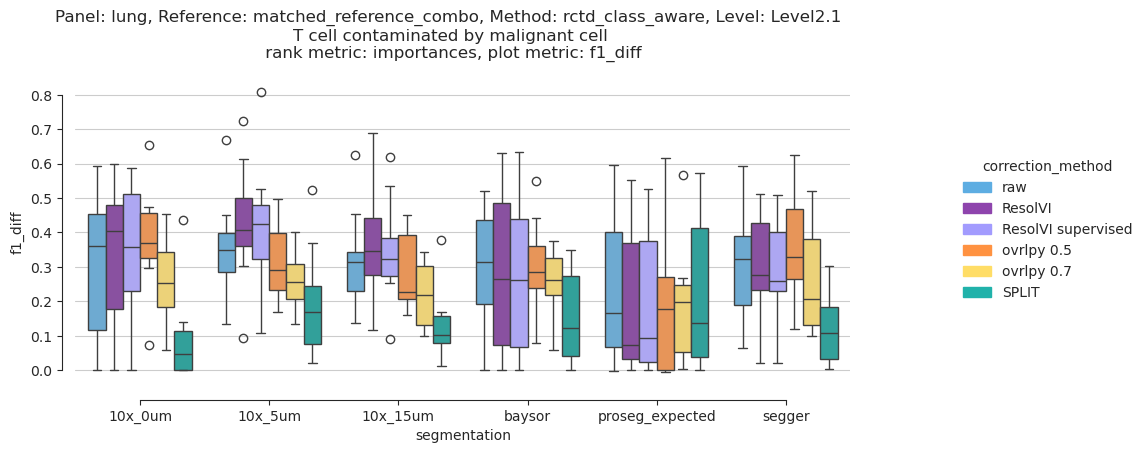

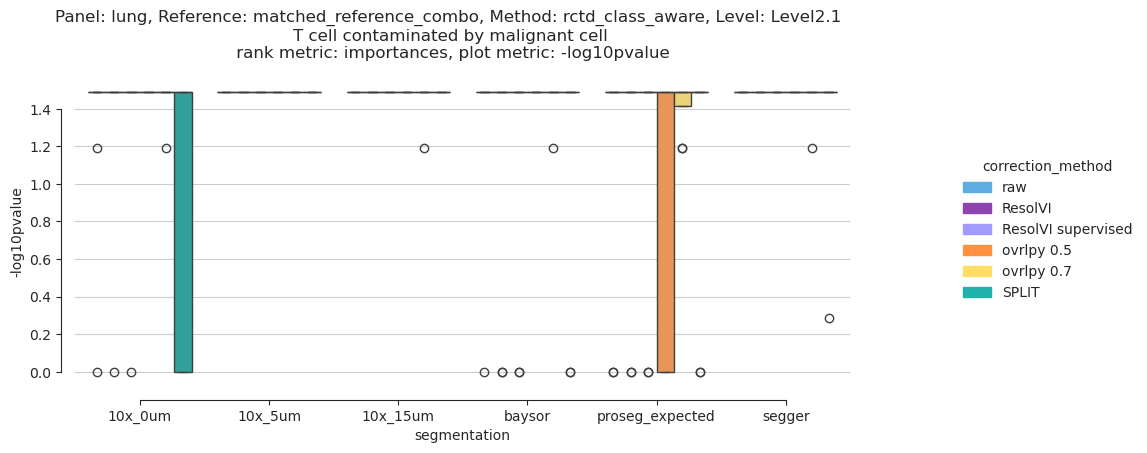

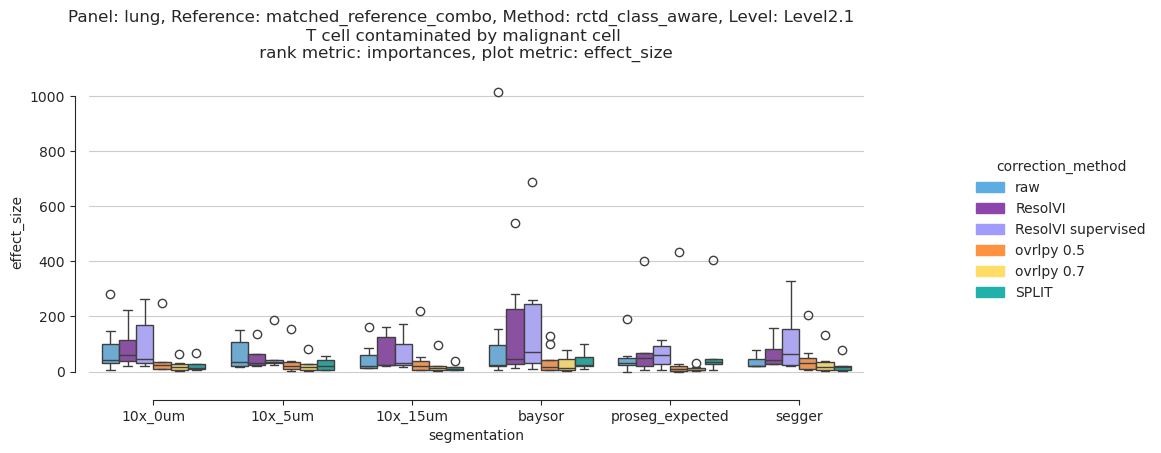

In [29]:

for plot_metric in ['f1_score','perm_meanf1_score','f1_diff','p_value','effect_size']:
    if plot_metric in ['p_value']:
        df['-log10pvalue'] = -np.log10(df[plot_metric].astype(float))
        plot_metric = '-log10pvalue'

    # plotting params, palette
    title = f"Panel: {ref_panel}, Reference: {reference}, Method: {method}, Level: {level} \n{cti} contaminated by {ctj}\n rank metric: {rank_metric}, plot metric: {plot_metric}"
    unique_labels = [c for c in hue_correction_order if c in np.unique(df[hue_correction].dropna())]
    unique_labels = unique_labels + [c for c in np.unique(df[hue_correction].dropna()) if c not in unique_labels]
    palette = {u: palette[u] for u in unique_labels}
    legend_handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]

    ### hypergeometric pvalue boxplot
    f = plt.figure(figsize=(10, 4))
    ax = plt.subplot()
    g = sns.boxplot(df,x='segmentation',y=plot_metric, 
                    hue=hue_correction, hue_order=unique_labels, 
                    legend=False, palette=palette,ax=ax,
                    order=[s for s in hue_segmentation_order if s in df['segmentation'].unique()],
                    # log_scale=True
                    )

    sns.despine(offset=10, trim=True)
    ax.yaxis.grid(True)

    plt.suptitle(title,y=1.05)
    f.legend(
        handles=legend_handles,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        title=hue_correction,
        frameon=False,
    )
    # plt.tight_layout(rect=[0, 0, 1, 0.95])
    # plt.savefig(out_file, dpi=dpi, bbox_inches="tight")
    plt.show()

# Plot results importances

In [ ]:
cti = 'T cell'
ctj = 'malignant cell'
ref_panel = 'lung'
ref_segmentation = '10x_5um'

df = {}
for correction_method in correction_methods:
    for k, v in dfs['df_importances_logreg'][correction_method].items():
        if k[0] != ref_segmentation or k[2] != ref_panel:
            continue
        # for (cti,ctj) in v.index.droplevel(2).unique():
        if (cti,ctj) in v.index:
            df[(correction_method, *k, cti, ctj)] = v.loc[(cti, ctj),'importances']

df = pd.DataFrame(df).T.reset_index()
df.columns = ["correction_method"] + xenium_levels + ["cti", "ctj"] + df.columns[8:].tolist()
# df = df.query("segmentation == @ref_segmentation and panel == @ref_panel and cti == @cti and ctj == @ctj")
# df = df.iloc[:,8:]
df_norm = df.copy()
df_norm.iloc[:,8:] =  df.iloc[:,8:].div(df.iloc[:,8:].abs().sum(axis=1),axis=0)

/tmp/ipykernel_2852035/2562548949.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (cti,ctj) in v.index:
/tmp/ipykernel_2852035/2562548949.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  df[(correction_method, *k, cti, ctj)] = v.loc[(cti, ctj),'importances']


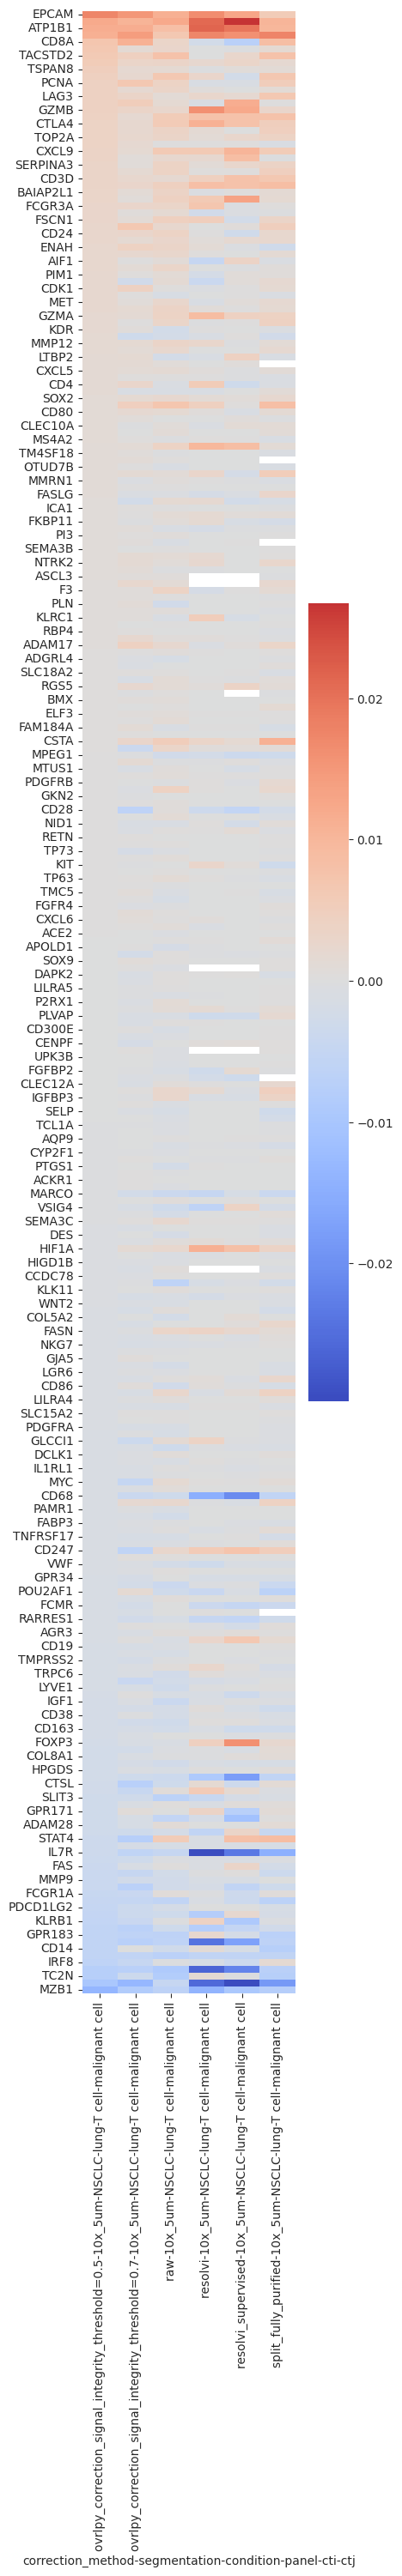

In [176]:
df_mean = df_norm.groupby(['correction_method','segmentation','condition','panel','cti','ctj'])[df_norm.columns[8:]].mean()
sort_cols = df_mean.iloc[0].sort_values(ascending=False).index

plt.figure(figsize=(4,30))
ax = sns.heatmap(df_mean.loc[:,sort_cols].T,cmap='coolwarm',center=0.)
# ax.set_yticklabels(df['correction_method'])

In [185]:
top_importances = pd.DataFrame()
for k,row in df_mean.iterrows():
    top_importances[k] = row.sort_values(ascending=False).index[:20]

In [187]:
top_importances.to_csv('../../scratch/top_importances.csv')

In [194]:
# Function to apply styling
def highlight_markers(val):
    if val in malignant_markers:
        return "background-color: red; color: white"  # Red for malignant markers
    elif val in tcell_markers:
        return "background-color: green; color: white"  # Green for T cell markers
    return ""  # Default styling

# Apply styling to the DataFrame (excluding the index column)
styled_df = top_importances.style.applymap(highlight_markers, subset=top_importances.columns)
styled_df


/tmp/ipykernel_2852035/2675646905.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = top_importances.style.applymap(highlight_markers, subset=top_importances.columns)


,"('ovrlpy_correction_signal_integrity_threshold=0.5', '10x_5um', 'NSCLC', 'lung', 'T cell', 'malignant cell')","('ovrlpy_correction_signal_integrity_threshold=0.7', '10x_5um', 'NSCLC', 'lung', 'T cell', 'malignant cell')","('raw', '10x_5um', 'NSCLC', 'lung', 'T cell', 'malignant cell')","('resolvi', '10x_5um', 'NSCLC', 'lung', 'T cell', 'malignant cell')","('resolvi_supervised', '10x_5um', 'NSCLC', 'lung', 'T cell', 'malignant cell')","('split_fully_purified', '10x_5um', 'NSCLC', 'lung', 'T cell', 'malignant cell')"
0,EPCAM,EPCAM,KRT7,ATP1B1,KRT7,CXCL13
1,KRT7,CXCL13,EPCAM,KRT7,ATP1B1,CSTA
2,ATP1B1,ATP1B1,ATP1B1,CXCL13,FOXP3,KRT7
3,CXCL13,CD8A,TACSTD2,EPCAM,CXCL13,ATP1B1
4,CD8A,KRT7,KLRD1,GZMB,RUNX3,STAT4
5,MUC1,HAVCR2,CDH1,HIF1A,EPCAM,CD8A
6,TACSTD2,PCNA,CXCL13,CTLA4,GZMB,CXCL10
7,CTTN,CXCR6,CXCL9,KRT15,CXCR6,KLRD1
8,TSPAN8,KLRD1,CTLA4,GZMA,CXCL9,CD2
9,CDH1,TACSTD2,CD2,CXCL10,KRT15,TACSTD2


In [191]:
# Define marker gene sets
malignant_markers = {"EPCAM", "KRT7", "TACSTD2", "ATP1B1", "CSTA"}  # Common epithelial/malignant markers
tcell_markers = {"CD8A", "CXCL13", "FOXP3", "GZMB", "RUNX3", "STAT4", "KLRD1"}  # Common T cell markers

# Count occurrences of malignant and T cell markers in each method
summary = {}
for col in top_importances.columns:  # Skip index column
    gene_list = set(top_importances[col])  # Unique genes in the method
    malignant_count = len(gene_list & malignant_markers)
    tcell_count = len(gene_list & tcell_markers)
    summary[col] = {"Malignant Markers": malignant_count, "T Cell Markers": tcell_count}

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary).T
summary_df


,,,,,,Malignant Markers,T Cell Markers
ovrlpy_correction_signal_integrity_threshold=0.5,10x_5um,NSCLC,lung,T cell,malignant cell,4,3
ovrlpy_correction_signal_integrity_threshold=0.7,10x_5um,NSCLC,lung,T cell,malignant cell,5,4
raw,10x_5um,NSCLC,lung,T cell,malignant cell,5,4
resolvi,10x_5um,NSCLC,lung,T cell,malignant cell,3,3
resolvi_supervised,10x_5um,NSCLC,lung,T cell,malignant cell,3,5
split_fully_purified,10x_5um,NSCLC,lung,T cell,malignant cell,5,4
